# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## This notebook was last tested with IPython notebook 4.1.0 using Python 2.7
### (If you have trouble running this notebook, please check version compatibility)

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from ipywidgets import interact, interact_manual, fixed, SelectMultiple

from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp, PipelineConfig
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Mid)

available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, Bands.Mid5C,
                   Bands.Sur1)

# The High Priority Science Objective list below includes the HPSOs that were originally intended for 
# The Survey telescope. These have since been reassigned to Mid.
available_hpsos = [HPSOs.hpso_max_Low_c, HPSOs.hpso_max_Low_s, HPSOs.hpso_max_Mid_c, HPSOs.hpso_max_Mid_s, 
                   HPSOs.hpso_max_band5_Mid_c, HPSOs.hpso_max_band5_Mid_s, 
                   HPSOs.hpso01c, HPSOs.hpso01s, HPSOs.hpso02A, HPSOs.hpso02B, HPSOs.hpso14, HPSOs.hpso14c, HPSOs.hpso14s, 
                   HPSOs.hpso22, HPSOs.hpso37a, HPSOs.hpso37b, HPSOs.hpso38a, HPSOs.hpso38b, 
                   HPSOs.hpso13c, HPSOs.hpso13s, HPSOs.hpso15c, HPSOs.hpso15s, 
                   HPSOs.hpso27, HPSOs.hpso33, HPSOs.hpso37c]

available_hpsos.sort()

available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = available_modes + (ImagingModes.All,)
verbose_display = False

## Using default values, we can compare telescopes side-by-side

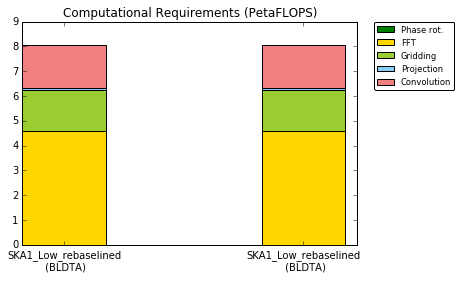

In [2]:
interact_manual(iapi.compare_telescopes_default,
                telescope_1=available_teles,telescope_2=available_teles,
                band_1=available_bands,
                band_2=available_bands,
                mode_1=available_modes_all,
                mode_2=available_modes_all,
                verbose=verbose_display,
                rows=SelectMultiple(value=iapi.DEFAULT_ROWS, options=iapi.ALL_ROWS))

## Using default values, can compute results for the High Priority Science Objectives

In [ ]:
interact_manual(iapi.evaluate_hpso_optimized, hpso_key=available_hpsos, verbose=verbose_display,
                rows=SelectMultiple(value=iapi.DEFAULT_ROWS, options=iapi.ALL_ROWS));

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,2**17,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display,
         rows=SelectMultiple(value=iapi.DEFAULT_ROWS, options=iapi.ALL_ROWS));

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
                band=available_bands, mode=available_modes_all, verbose=verbose_display,
                rows=SelectMultiple(value=iapi.DEFAULT_ROWS, options=iapi.ALL_ROWS));

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Bmax, evaluating expression Rflop over range (20000, 150000) in 100 steps (i.e. 101 data points)
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 0.0% done: Evaluating Rflop for Bmax = 20000
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 1.0% done: Evaluating Rflop for Bmax = 21300
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 2.0% done: Evaluating Rflop for Bmax = 22600
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 3.0% done: Evaluating Rflop for Bmax = 23900
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 4.0% done: Evaluating Rflop for Bmax = 25200
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 5.0% done: Evaluating Rflop for Bmax = 26500
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 5.9% done: Evaluating Rflop for Bmax = 27800
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 6.9% done: Evaluating Rflop for Bmax = 29100
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 7.9% done: Evaluating Rflop for Bmax =

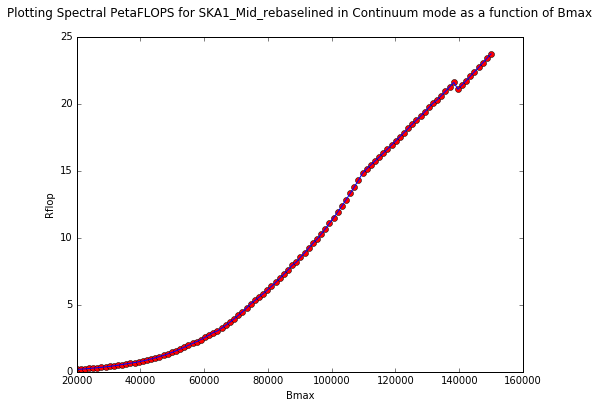

20000.0 , 0.173995760207
21300.0 , 0.195443888745
22600.0 , 0.219939101393
23900.0 , 0.247841431059
25200.0 , 0.278446520754
26500.0 , 0.304349225253
27800.0 , 0.334831844948
29100.0 , 0.368231141904
30400.0 , 0.405272453448
31700.0 , 0.445631725745
33000.0 , 0.490556093804
34300.0 , 0.539960313222
35600.0 , 0.5909685409
36900.0 , 0.642537640302
38200.0 , 0.686615196461
39500.0 , 0.746671096947
40800.0 , 0.811974007957
42100.0 , 0.882900580052
43400.0 , 0.959829936597
44700.0 , 1.04282469803
46000.0 , 1.13289654879
47300.0 , 1.23012137355
48600.0 , 1.33477725474
49900.0 , 1.44747260921
51200.0 , 1.56804921233
52500.0 , 1.69778618635
53800.0 , 1.83665005206
55100.0 , 1.9833800802
56400.0 , 2.11922411833
57700.0 , 2.25641898737
59000.0 , 2.41016958064
60300.0 , 2.57372900051
61600.0 , 2.74756823302
62900.0 , 2.93215908614
64200.0 , 3.05496702267
65500.0 , 3.26040349066
66800.0 , 3.47798685358
68100.0 , 3.70833012499
69400.0 , 3.95183936244
70700.0 , 4.20880514179
72000.0 , 4.48007734813


In [5]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Bmax'
param_val_min =20000
param_val_max = 150000
number_steps = 100
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.Continuum
band=Bands.Mid5C

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
cfg = PipelineConfig(telescope=telescope, mode=immode, band=band)
(param_values, results) = iapi.eval_param_sweep_1d(cfg, expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

In [ ]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
immode = ImagingModes.FastImg
expression = 'Rflop'
parameters = ('Bmax', 'Tobs')
parameter_ranges = ((30000,150000),(0.15,2.0))
number_steps = 4
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
cfg = PipelineConfig(telescope=telescope, mode=immode, band=band)
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(cfg, expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))